In [1]:
import os

import matplotlib.pyplot as plt

from hemlock import User, Branch, Page
from hemlock.app import create_app, db
from hemlock.questions import Label

if os.path.exists("data.db"):
    os.remove("data.db")

from hemlock.app import bp

@bp.route("/")
def index():
    return "Hello, world"

app = create_app()
app.app_context().push()
db.create_all()

with app.test_request_context():
    user = User()
db.session.add(user)
db.session.commit()

In [2]:
def navigate(branch):
    user.page = branch.pages[0]
    db.session.commit()
    display_navigation()

    print(f"{20*'='}\nNavigating forward\n{20*'='}")
    while not user.page.is_last_page():
        user.go_forward()
        display_navigation()

    print(f"{20*'='}\nNavigating back\n{20*'='}")
    while not user.page.is_first_page():
        user.go_back()
        display_navigation()

def display_navigation():
    print(user.page)
    user.display_navigation()
    plt.show()

<Page id: 1>
    <Label Hello, world! - default: None>


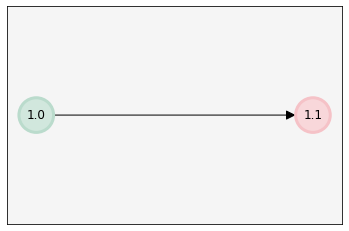

Navigating forward
<Page id: 2>
    <Label Hello, moon! - default: None>


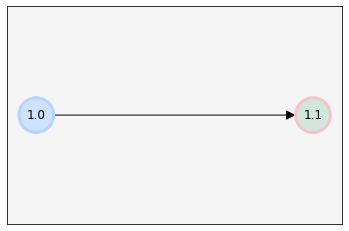

Navigating back
<Page id: 1>
    <Label Hello, world! - default: None>


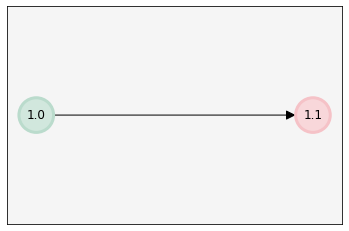

In [3]:
branch = Branch(
    Page(
        Label("Hello, world!")
    ),
    Page(
        Label("Hello, moon!"),
        terminal=True
    )
)
navigate(branch)

<Page id: 4>
    <Label Hello, world! - default: None>


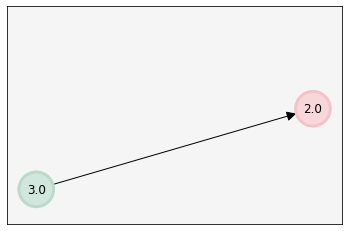

Navigating forward
<Page id: 3>
    <Label Hello, moon! - default: None>


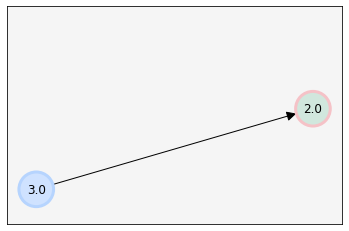

Navigating back
<Page id: 4>
    <Label Hello, world! - default: None>


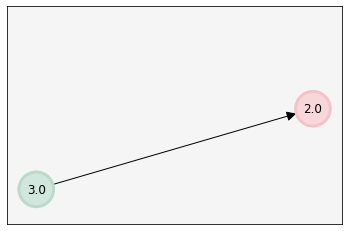

In [4]:
branch = Branch(
    Page(
        Label("Hello, world!")
    )
)
branch.next_branch = Branch(
    Page(
        Label("Hello, moon!"),
        terminal=True
    )
)
navigate(branch)

<Page id: 5>
    <Label Hello, world! - default: None>


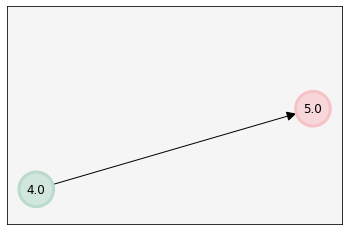

Navigating forward
<Page id: 6>
    <Label Hello, moon! - default: None>


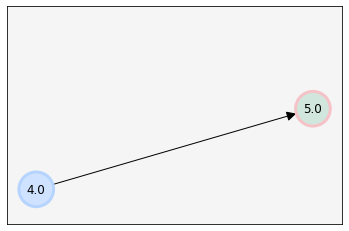

Navigating back
<Page id: 5>
    <Label Hello, world! - default: None>


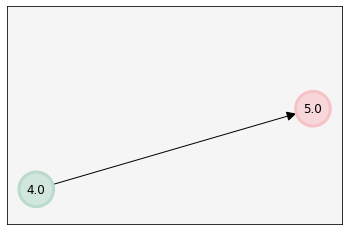

In [5]:
branch = Branch(
    Page(
        Label("Hello, world!")
    )
)
branch.pages[0].next_branch = Branch(
    Page(
        Label("Hello, moon!"),
        terminal=True
    )
)
navigate(branch)

<Page id: 7>
    <Label Hello, world! - default: None>


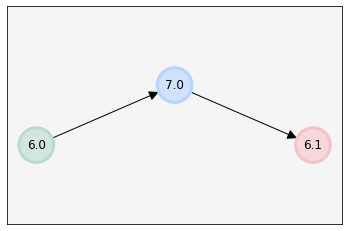

Navigating forward
<Page id: 9>
    <Label Hello, moon! - default: None>


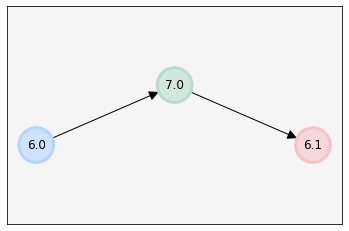

<Page id: 8>
    <Label Hello, star! - default: None>


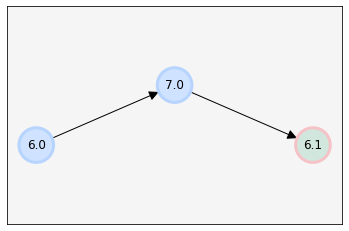

Navigating back
<Page id: 9>
    <Label Hello, moon! - default: None>


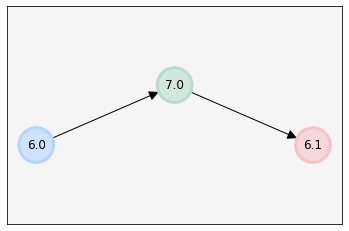

<Page id: 7>
    <Label Hello, world! - default: None>


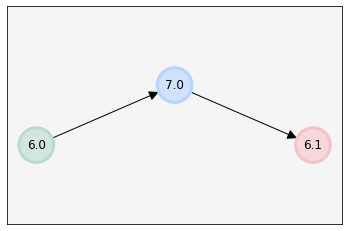

In [6]:
branch = Branch(
    Page(
        Label("Hello, world!")
    ),
    Page(
        Label("Hello, star!"),
        terminal=True
    )
)
branch.pages[0].next_branch = Branch(
    Page(
        Label("Hello, moon!")
    )
)
navigate(branch)

<Page id: 11>
    <Label Hello, world! - default: None>


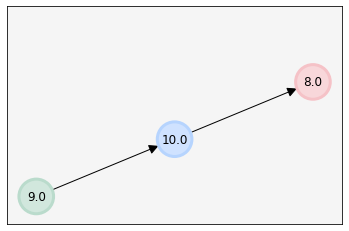

Navigating forward
<Page id: 12>
    <Label Hello, moon! - default: None>


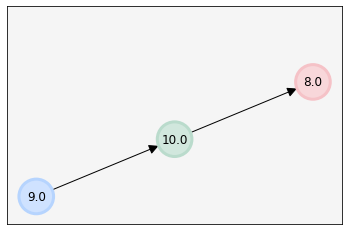

<Page id: 10>
    <Label Hello, sun! - default: None>


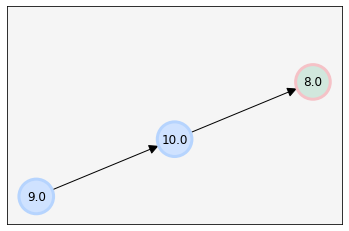

Navigating back
<Page id: 12>
    <Label Hello, moon! - default: None>


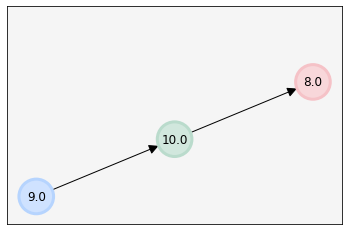

<Page id: 11>
    <Label Hello, world! - default: None>


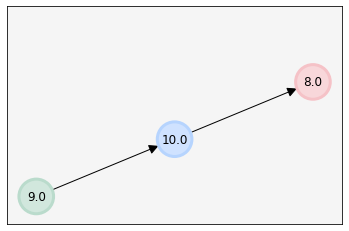

In [7]:
branch = Branch(
    Page(
        Label("Hello, world!")
    )
)
branch.pages[0].next_branch = Branch(
    Page(
        Label("Hello, moon!")
    )
)
branch.next_branch = Branch(
    Page(
        Label("Hello, sun!"),
        terminal=True
    )
)
navigate(branch)

<Page id: 13>
    <Label Hello, world! - default: None>


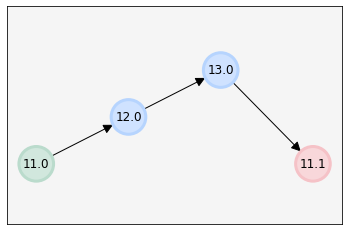

Navigating forward
<Page id: 15>
    <Label Hello, moon! - default: None>


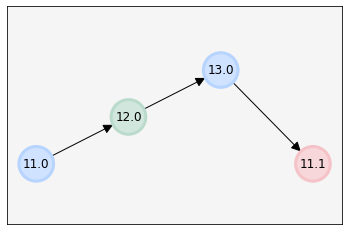

<Page id: 16>
    <Label Hello, sun! - default: None>


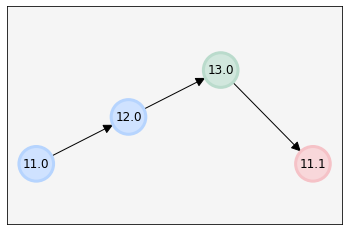

<Page id: 14>
    <Label Hello, star! - default: None>


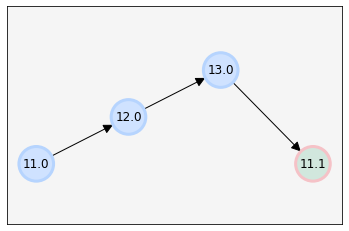

Navigating back
<Page id: 16>
    <Label Hello, sun! - default: None>


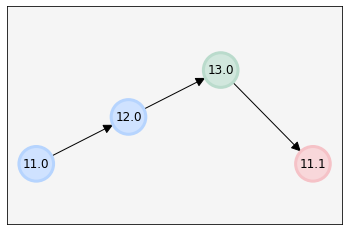

<Page id: 15>
    <Label Hello, moon! - default: None>


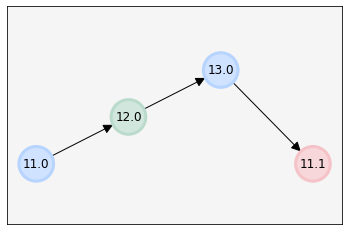

<Page id: 13>
    <Label Hello, world! - default: None>


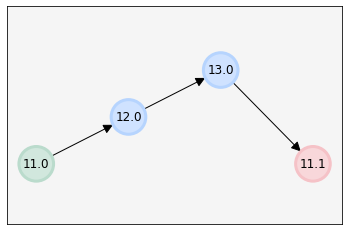

In [8]:
branch = Branch(
    Page(
        Label("Hello, world!")
    ),
    Page(
        Label("Hello, star!"),
        terminal=True
    )
)
branch.pages[0].next_branch = Branch(
    Page(
        Label("Hello, moon!")
    )
)
branch.pages[0].next_branch.pages[0].next_branch = Branch(
    Page(
        Label("Hello, sun!")
    )
)
navigate(branch)

<Page id: 17>
    <Label Hello, world! - default: None>


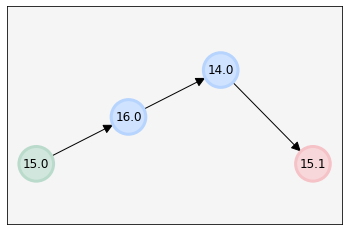

Navigating forward
<Page id: 20>
    <Label Hello, moon! - default: None>


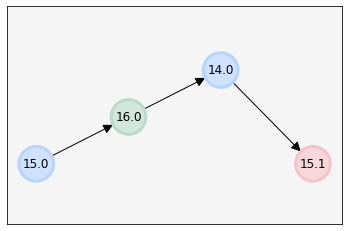

<Page id: 18>
    <Label Hello, sun! - default: None>


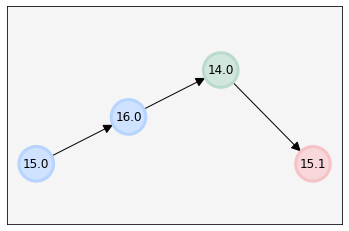

<Page id: 19>
    <Label Hello, star! - default: None>


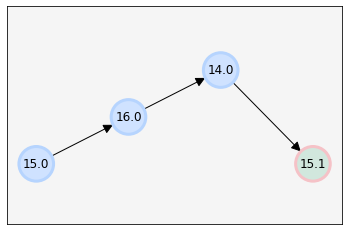

Navigating back
<Page id: 18>
    <Label Hello, sun! - default: None>


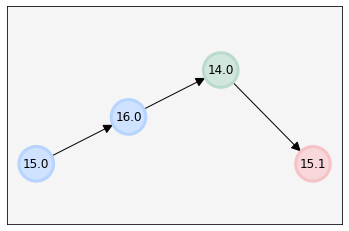

<Page id: 20>
    <Label Hello, moon! - default: None>


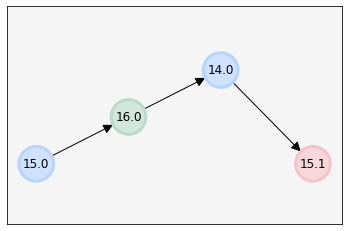

<Page id: 17>
    <Label Hello, world! - default: None>


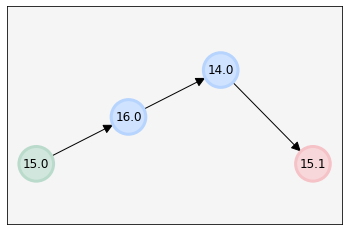

In [10]:
branch = Branch(
    Page(
        Label("Hello, world!")
    ),
    Page(
        Label("Hello, star!"),
        terminal=True
    )
)
branch.pages[0].next_branch = Branch(
    Page(
        Label("Hello, moon!")
    )
)
branch.pages[0].next_branch.next_branch = Branch(
    Page(
        Label("Hello, sun!")
    )
)
navigate(branch)